# Data Analysis Project on E-commerce Fashion Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score)
import joblib
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [2]:
# Load your dataset
dataset = pd.read_excel('D:\\DATA ANALYTICS PROJECT\\FASHION_DATA.xlsx')

In [3]:
# Display the first few records of the dataset
print(dataset.head())

   ID Consumer ID  Gender Age Group  Income ($) Occupation  Preferred Style  \
0   1        C001  Female     18-24       30000    Student           Casual   
1   2        C002    Male     25-34       60000   Engineer     Smart Casual   
2   3        C003  Female     35-44       45000    Teacher  Business Casual   
3   4        C004    Male     18-24       25000    Student           Casual   
4   5        C005  Female     25-34       70000  Marketing           Trendy   

  Favorite Brand  Purchase Frequency (per month)  Avg Spend per Purchase ($)  \
0           Nike                               3                          50   
1           Zara                               2                          70   
2            H&M                               1                         100   
3         Adidas                               4                          40   
4          Gucci                               1                         150   

   ... Color Preference Online Shopping Freq

In [4]:
# Drop 'ID' , 'Last Purchase Date'and 'Consumer ID' columns from the DataFrame bcoz its unnecessary columns
dataset = dataset.drop(['ID', 'Consumer ID','Last Purchase Date' ], axis=1)



In [5]:
# Display the first few rows of the updated DataFrame
print(dataset.head())


   Gender Age Group  Income ($) Occupation  Preferred Style Favorite Brand  \
0  Female     18-24       30000    Student           Casual           Nike   
1    Male     25-34       60000   Engineer     Smart Casual           Zara   
2  Female     35-44       45000    Teacher  Business Casual            H&M   
3    Male     18-24       25000    Student           Casual         Adidas   
4  Female     25-34       70000  Marketing           Trendy          Gucci   

   Purchase Frequency (per month)  Avg Spend per Purchase ($)  \
0                               3                          50   
1                               2                          70   
2                               1                         100   
3                               4                          40   
4                               1                         150   

  Preferred Material Size Color Preference Online Shopping Frequency  \
0             Cotton    M             Blue                    Weekly

In [6]:
# Define features (X) and target variable (y)
x = dataset.drop([ 'Preferred Style'], axis=1)  # Exclude non-feature columns
y = dataset['Preferred Style']  # Set your target variable


In [7]:
# Initialize LabelEncoder and MinMaxScaler
le = LabelEncoder()
scaler = MinMaxScaler()



In [8]:
# Fit the LabelEncoder on the entire column from the training data
for column in x.select_dtypes(include=['object']).columns:
    x[column] = le.fit_transform(x[column])  # Fit and transform on training data



In [9]:
# Encode target variable
y = le.fit_transform(y)


In [10]:
# Scale features
x_scaled = scaler.fit_transform(x)


In [11]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(800, 18) (200, 18) (800,) (200,)


In [12]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=4, random_state=2, max_depth=10),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC(kernel='poly', degree=3, C=1, probability=True),
    'MLP': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.1, n_estimators=20, max_depth=3)
}



In [13]:
# Voting Classifier
voting_estimators = [
    ('NB', GaussianNB()),
    ('SVM', SVC(kernel='poly', degree=3, C=1, probability=True)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42))
]

models['Voting Classifier - Hard'] = VotingClassifier(estimators=voting_estimators, voting='hard')
models['Voting Classifier - Soft'] = VotingClassifier(estimators=voting_estimators, voting='soft')


In [14]:
# Cross-validation
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    results[model_name] = scores.mean()
    print(f"{model_name}: {scores.mean()} ± {scores.std()}")


Decision Tree: 0.93875 ± 0.024811791551599
Random Forest: 0.9525 ± 0.021866069605669884
Naive Bayes: 0.8787499999999999 ± 0.022912878474779186
KNN: 0.9475000000000001 ± 0.014577379737113247
SVM: 0.94375 ± 0.02931509849889646
MLP: 0.9512500000000002 ± 0.026040833319999568
Gradient Boosting: 0.9512500000000002 ± 0.013919410907075049
Voting Classifier - Hard: 0.9487500000000001 ± 0.025124689052802223
Voting Classifier - Soft: 0.9487500000000001 ± 0.015512092057488599


In [15]:
# Find the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")



Best Model: Random Forest


In [16]:
# Fit the best model
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)


In [17]:
# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
error_percentage = 1 - accuracy

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Error Percentage: {error_percentage}")

target_names = le.inverse_transform(np.unique(y))



Model Evaluation Metrics:
Accuracy: 0.95
Precision: 0.9538186900189137
Recall: 0.95
F1 Score: 0.9502655143393319
Error Percentage: 0.050000000000000044


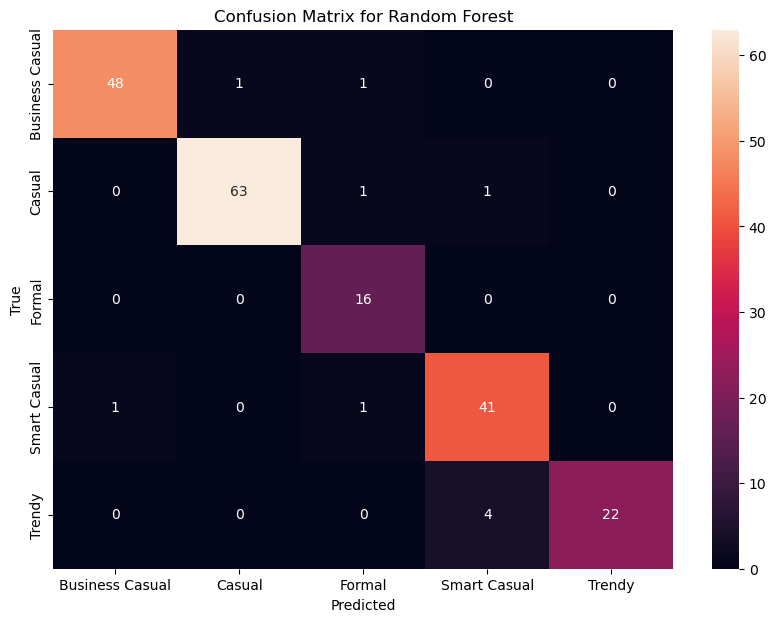

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()


In [19]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))



Classification Report:
                 precision    recall  f1-score   support

Business Casual       0.98      0.96      0.97        50
         Casual       0.98      0.97      0.98        65
         Formal       0.84      1.00      0.91        16
   Smart Casual       0.89      0.95      0.92        43
         Trendy       1.00      0.85      0.92        26

       accuracy                           0.95       200
      macro avg       0.94      0.95      0.94       200
   weighted avg       0.95      0.95      0.95       200



In [20]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler
joblib.dump(le, 'label_encoder.pkl')  # Save the label encoder

['label_encoder.pkl']